<a href="https://colab.research.google.com/github/naveen09peesari/AIML_1339/blob/main/AIML%20lab%2008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:


!pip install openml seaborn matplotlib scikit-learn





  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.3 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=411cadd14bbdf6f4cd6aced1300abd8c835cecfaaf33450de25f42a0497dd2d3
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import openml


sns.set(style="whitegrid")


In [10]:
!pip install openml seaborn matplotlib scikit-learn


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import openml



In [11]:
sns.set(style="whitegrid")


In [12]:
car_data = openml.datasets.get_dataset(40978)  # The ID for the car dataset
X, y, _, _ = car_data.get_data(target=car_data.default_target_attribute)


In [13]:
feature_names = X.columns.tolist()

In [14]:
print("Feature Names:")
print(feature_names)
print("\nData Description:")
print(X.describe())

Feature Names:
['height', 'width', 'aratio', 'local', 'url.images.buttons', 'url.likesbooks.com', 'url.www.slake.com', 'url.hydrogeologist', 'url.oso', 'url.media', 'url.peace.images', 'url.blipverts', 'url.tkaine.kats', 'url.labyrinth', 'url.advertising.blipverts', 'url.images.oso', 'url.area51.corridor', 'url.ran.gifs', 'url.express.scripts.com', 'url.off', 'url.cnet', 'url.time.1998', 'url.josefina3', 'url.truluck.com', 'url.clawnext.gif', 'url.autopen.com', 'url.tvgen.com', 'url.pixs', 'url.heartland.5309', 'url.meadows.9196', 'url.blue', 'url.ad.gif', 'url.area51', 'url.www.internauts.ca', 'url.afn.org', 'url.ran.org', 'url.shareware.com', 'url.baons.images', 'url.area51.labyrinth', 'url.pics', 'url.image.navigate', 'url.pool.images', 'url.carousel.org', 'url.members.accessus.net', 'url.cmp.flowsoft010', 'url.smallb.gif', 'url.www.FlowSoft.com', 'url.kandinsky', 'url.csuhayward.edu', 'url.www.yahoo.co.uk', 'url.ibitexas.com', 'url.www.haestad.com', 'url.antiwar.com', 'url.www.monm

In [15]:
missing_values = X.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)



Missing Values in Each Column:
height                0
width                 0
aratio                0
local                 0
url.images.buttons    0
                     ..
caption.bytes         0
caption.here          0
caption.click         0
caption.for           0
caption.you           0
Length: 1558, dtype: int64


In [16]:
target_column = 'class'  # Adjust based on the actual target column name in your dataset
X[target_column] = y


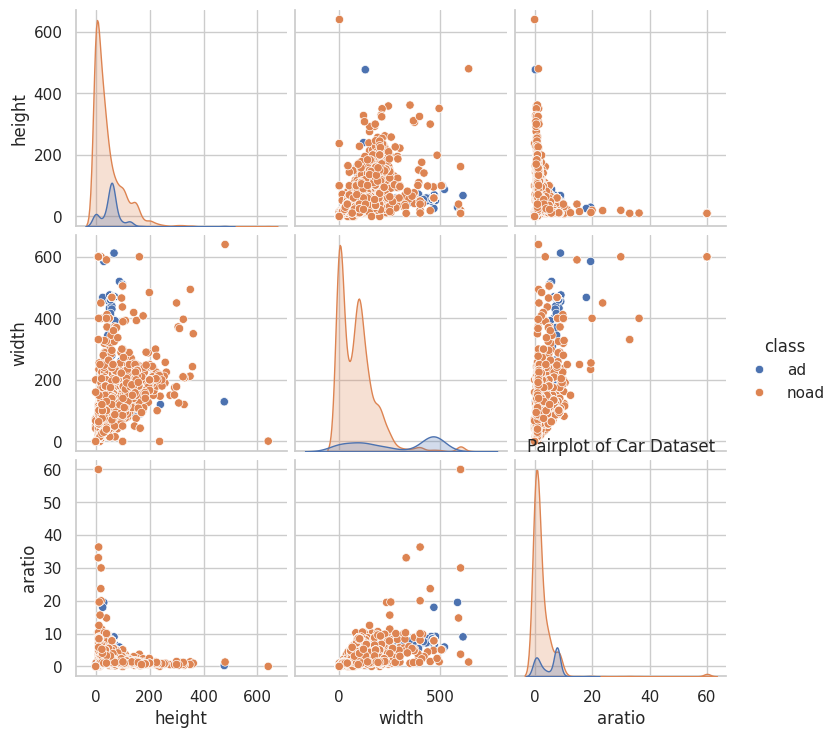

In [17]:
sns.pairplot(X, hue=target_column)
plt.title('Pairplot of Car Dataset')
plt.show()

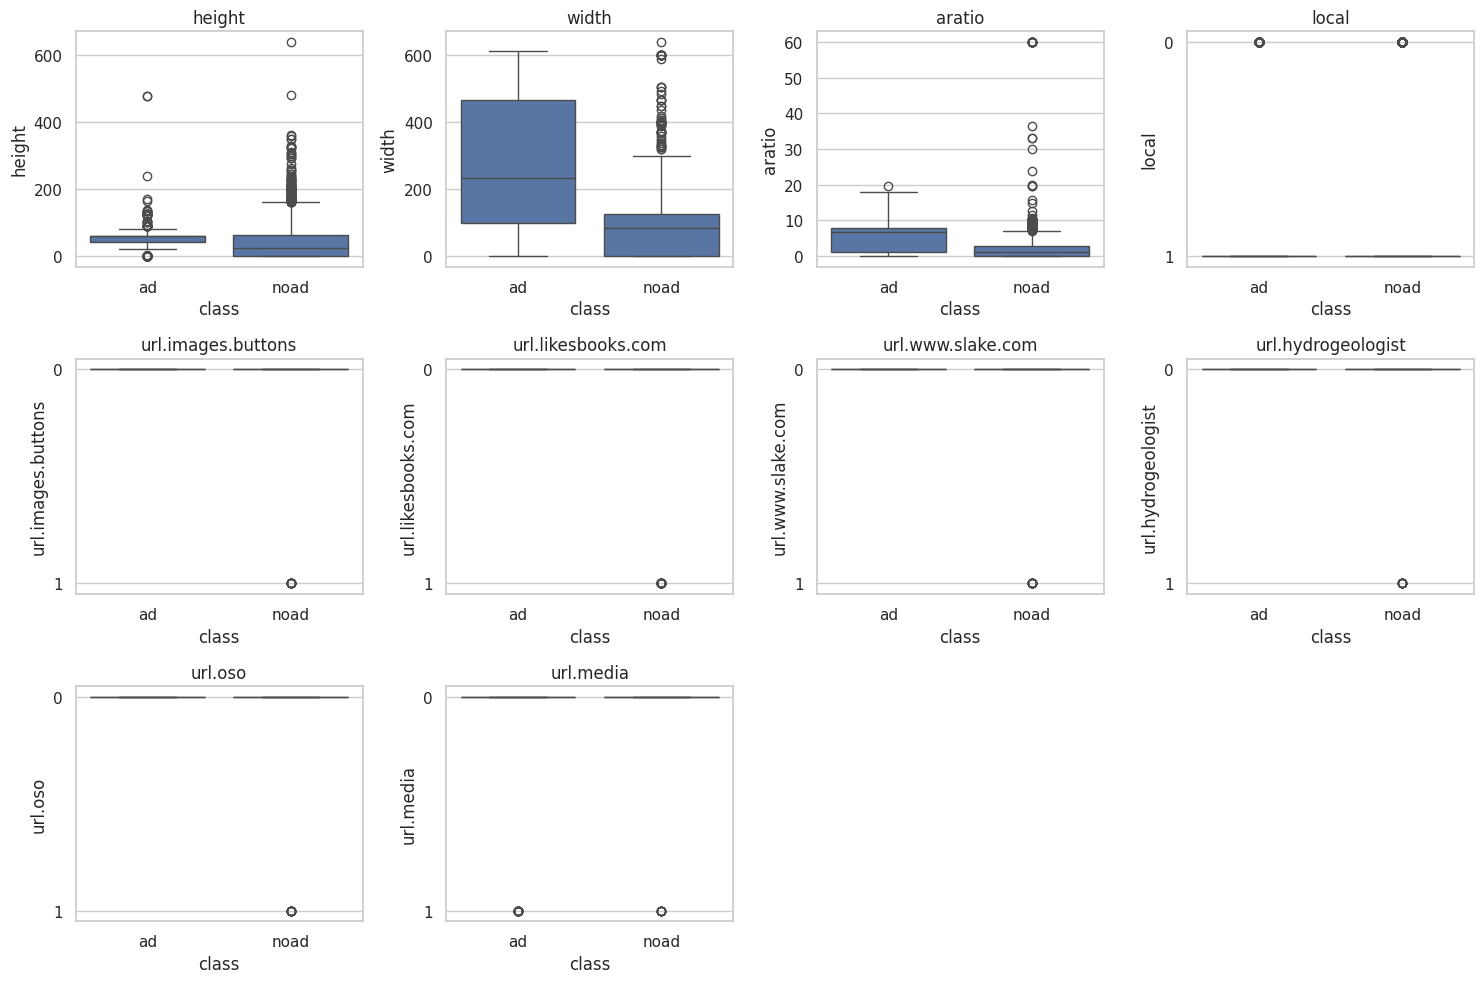

In [21]:
plt.figure(figsize=(15, 10))
for i in range(min(10, X.shape[1] - 1)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=target_column, y=X.columns[i], data=X)
    plt.title(X.columns[i])
plt.tight_layout()
plt.show()

In [22]:
X_features = X.drop(columns=[target_column])
y_target = X[target_column]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (2623, 1558)
Testing Data Shape: (656, 1558)


In [24]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [25]:
y_pred = dt_classifier.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of Decision Tree Classifier:", accuracy)



Accuracy of Decision Tree Classifier: 0.9603658536585366


In [27]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

          ad       0.92      0.85      0.88       114
        noad       0.97      0.98      0.98       542

    accuracy                           0.96       656
   macro avg       0.94      0.92      0.93       656
weighted avg       0.96      0.96      0.96       656



In [28]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[ 97  17]
 [  9 533]]


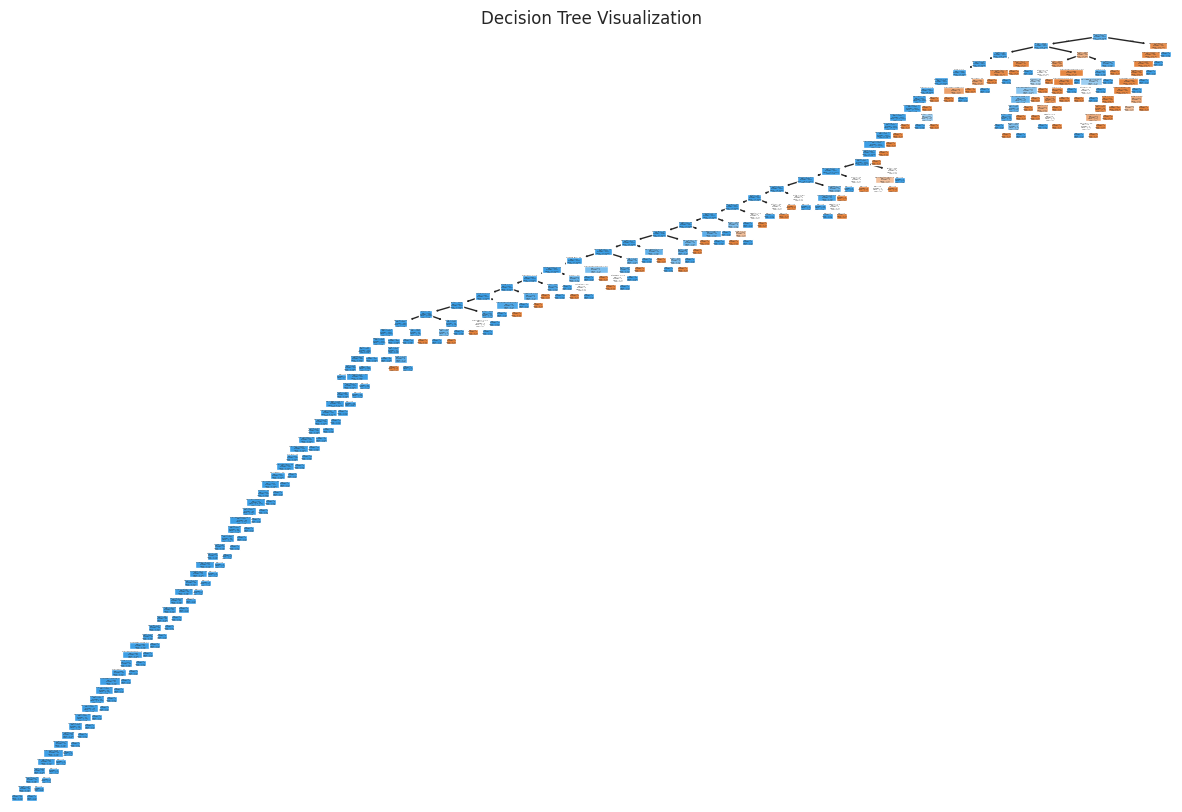

In [29]:
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_features.columns, class_names=np.unique(y_target))
plt.title('Decision Tree Visualization')
plt.show()